In [1]:
import os
import sys
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm

prj_dir = os.path.abspath(os.getcwd() + '/..')
print(prj_dir)
sys.path.append(prj_dir)

/Users/raul.sanchez/data_scientia/rulo_mota_omath


In [2]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import shap
from sklearn.model_selection import train_test_split

from src import config
from src.features import X_features
from src.features import banxico_mun_income_remittances

In [3]:
path = os.path.join(
    config.PRJ_DIR,
    'data/processed/X.csv')

data = pd.read_csv(path)
data.set_index('id', inplace=True)

remittances_raw = banxico_mun_income_remittances.get()

In [7]:
lower_bound, upper_bound = remittances_raw['Remittance Amount Million USD'].quantile([.05, .95]).tolist()

remittances = remittances_raw[(
    remittances_raw['Remittance Amount Million USD'] > lower_bound
) & (
    remittances_raw['Remittance Amount Million USD'] < upper_bound
)]

In [8]:
data['Remittance Amount Million USD'] = remittances_raw['Remittance Amount Million USD']

[0]	validation_0-rmse:0.43307	validation_1-rmse:0.41614
[1]	validation_0-rmse:0.42948	validation_1-rmse:0.41322
[2]	validation_0-rmse:0.42593	validation_1-rmse:0.41034
[3]	validation_0-rmse:0.42241	validation_1-rmse:0.40750
[4]	validation_0-rmse:0.41894	validation_1-rmse:0.40475
[5]	validation_0-rmse:0.41550	validation_1-rmse:0.40200
[6]	validation_0-rmse:0.41210	validation_1-rmse:0.39929
[7]	validation_0-rmse:0.40879	validation_1-rmse:0.39666
[8]	validation_0-rmse:0.40552	validation_1-rmse:0.39403
[9]	validation_0-rmse:0.40224	validation_1-rmse:0.39144


divide by zero encountered in log1p
invalid value encountered in log1p


[10]	validation_0-rmse:0.39904	validation_1-rmse:0.38892
[11]	validation_0-rmse:0.39587	validation_1-rmse:0.38640
[12]	validation_0-rmse:0.39274	validation_1-rmse:0.38393
[13]	validation_0-rmse:0.38964	validation_1-rmse:0.38153
[14]	validation_0-rmse:0.38656	validation_1-rmse:0.37913
[15]	validation_0-rmse:0.38355	validation_1-rmse:0.37677
[16]	validation_0-rmse:0.38047	validation_1-rmse:0.37448
[17]	validation_0-rmse:0.37749	validation_1-rmse:0.37214
[18]	validation_0-rmse:0.37456	validation_1-rmse:0.36987
[19]	validation_0-rmse:0.37152	validation_1-rmse:0.36775
[20]	validation_0-rmse:0.36852	validation_1-rmse:0.36566
[21]	validation_0-rmse:0.36555	validation_1-rmse:0.36363
[22]	validation_0-rmse:0.36258	validation_1-rmse:0.36157
[23]	validation_0-rmse:0.35968	validation_1-rmse:0.35963
[24]	validation_0-rmse:0.35680	validation_1-rmse:0.35772
[25]	validation_0-rmse:0.35392	validation_1-rmse:0.35578
[26]	validation_0-rmse:0.35111	validation_1-rmse:0.35393
[27]	validation_0-rmse:0.34832	

[153]	validation_0-rmse:0.15132	validation_1-rmse:0.24303
[154]	validation_0-rmse:0.15060	validation_1-rmse:0.24283
[155]	validation_0-rmse:0.14975	validation_1-rmse:0.24261
[156]	validation_0-rmse:0.14895	validation_1-rmse:0.24240
[157]	validation_0-rmse:0.14818	validation_1-rmse:0.24216
[158]	validation_0-rmse:0.14736	validation_1-rmse:0.24203
[159]	validation_0-rmse:0.14662	validation_1-rmse:0.24192
[160]	validation_0-rmse:0.14588	validation_1-rmse:0.24179
[161]	validation_0-rmse:0.14512	validation_1-rmse:0.24151
[162]	validation_0-rmse:0.14441	validation_1-rmse:0.24140
[163]	validation_0-rmse:0.14368	validation_1-rmse:0.24125
[164]	validation_0-rmse:0.14297	validation_1-rmse:0.24110
[165]	validation_0-rmse:0.14227	validation_1-rmse:0.24099
[166]	validation_0-rmse:0.14155	validation_1-rmse:0.24090
[167]	validation_0-rmse:0.14090	validation_1-rmse:0.24078
[168]	validation_0-rmse:0.14019	validation_1-rmse:0.24072
[169]	validation_0-rmse:0.13956	validation_1-rmse:0.24063
[170]	validati

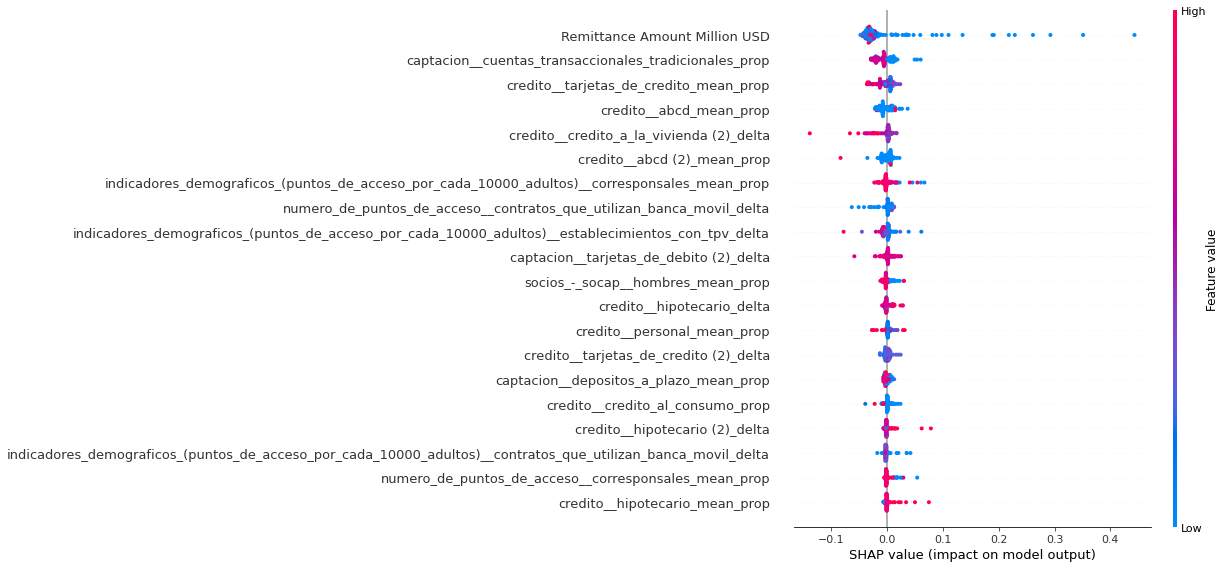

[0]	validation_0-rmse:0.43352	validation_1-rmse:0.43236
[1]	validation_0-rmse:0.43048	validation_1-rmse:0.43052
[2]	validation_0-rmse:0.42747	validation_1-rmse:0.42881
[3]	validation_0-rmse:0.42450	validation_1-rmse:0.42700
[4]	validation_0-rmse:0.42157	validation_1-rmse:0.42526
[5]	validation_0-rmse:0.41868	validation_1-rmse:0.42372
[6]	validation_0-rmse:0.41580	validation_1-rmse:0.42189
[7]	validation_0-rmse:0.41298	validation_1-rmse:0.42039
[8]	validation_0-rmse:0.41018	validation_1-rmse:0.41878
[9]	validation_0-rmse:0.40743	validation_1-rmse:0.41694
[10]	validation_0-rmse:0.40472	validation_1-rmse:0.41509


divide by zero encountered in log1p
invalid value encountered in log1p


[11]	validation_0-rmse:0.40202	validation_1-rmse:0.41383
[12]	validation_0-rmse:0.39938	validation_1-rmse:0.41229
[13]	validation_0-rmse:0.39676	validation_1-rmse:0.41101
[14]	validation_0-rmse:0.39418	validation_1-rmse:0.40933
[15]	validation_0-rmse:0.39151	validation_1-rmse:0.40813
[16]	validation_0-rmse:0.38902	validation_1-rmse:0.40664
[17]	validation_0-rmse:0.38647	validation_1-rmse:0.40552
[18]	validation_0-rmse:0.38386	validation_1-rmse:0.40433
[19]	validation_0-rmse:0.38133	validation_1-rmse:0.40277
[20]	validation_0-rmse:0.37884	validation_1-rmse:0.40140
[21]	validation_0-rmse:0.37646	validation_1-rmse:0.40018
[22]	validation_0-rmse:0.37395	validation_1-rmse:0.39899
[23]	validation_0-rmse:0.37152	validation_1-rmse:0.39780
[24]	validation_0-rmse:0.36918	validation_1-rmse:0.39665
[25]	validation_0-rmse:0.36678	validation_1-rmse:0.39555
[26]	validation_0-rmse:0.36449	validation_1-rmse:0.39440
[27]	validation_0-rmse:0.36223	validation_1-rmse:0.39322
[28]	validation_0-rmse:0.35992	

[154]	validation_0-rmse:0.18477	validation_1-rmse:0.33397
[155]	validation_0-rmse:0.18388	validation_1-rmse:0.33396
[156]	validation_0-rmse:0.18311	validation_1-rmse:0.33394
[157]	validation_0-rmse:0.18244	validation_1-rmse:0.33399
[158]	validation_0-rmse:0.18162	validation_1-rmse:0.33393
[159]	validation_0-rmse:0.18109	validation_1-rmse:0.33395
[160]	validation_0-rmse:0.18043	validation_1-rmse:0.33400
[161]	validation_0-rmse:0.17976	validation_1-rmse:0.33381
[162]	validation_0-rmse:0.17890	validation_1-rmse:0.33373
[163]	validation_0-rmse:0.17825	validation_1-rmse:0.33355
[164]	validation_0-rmse:0.17761	validation_1-rmse:0.33359
[165]	validation_0-rmse:0.17680	validation_1-rmse:0.33350
[166]	validation_0-rmse:0.17617	validation_1-rmse:0.33339
[167]	validation_0-rmse:0.17541	validation_1-rmse:0.33341
[168]	validation_0-rmse:0.17470	validation_1-rmse:0.33332
[169]	validation_0-rmse:0.17409	validation_1-rmse:0.33319
[170]	validation_0-rmse:0.17348	validation_1-rmse:0.33313
[171]	validati

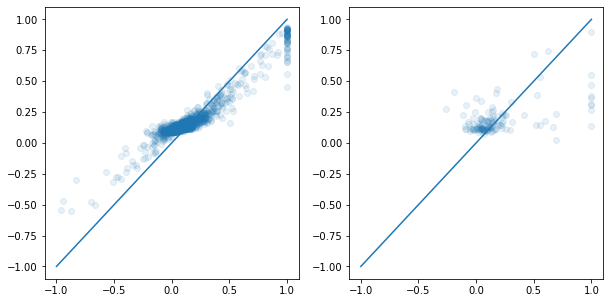

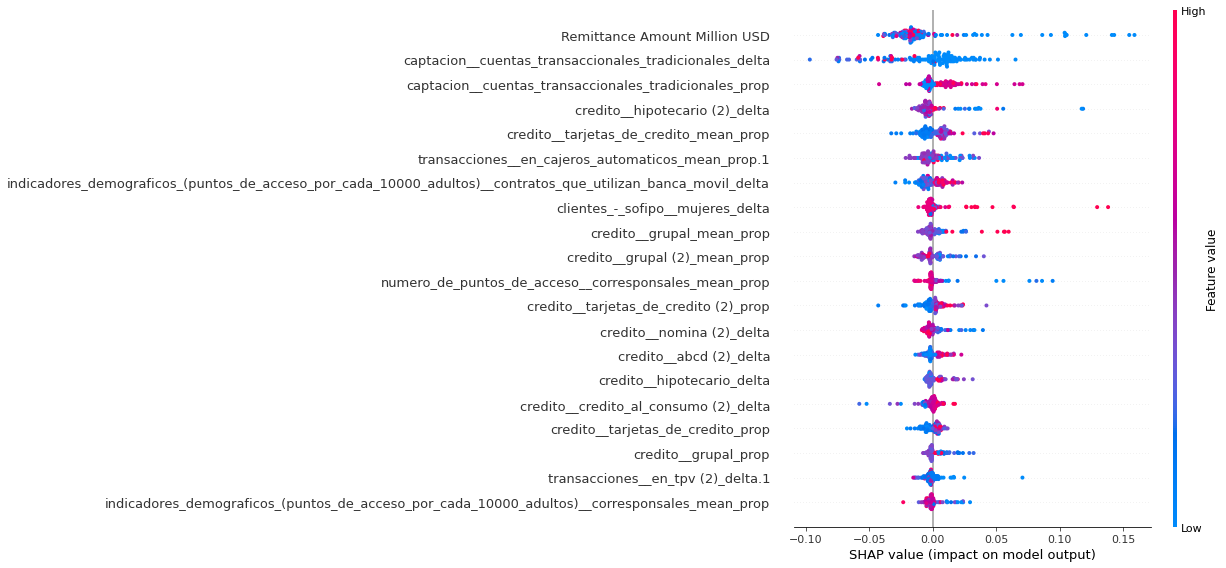

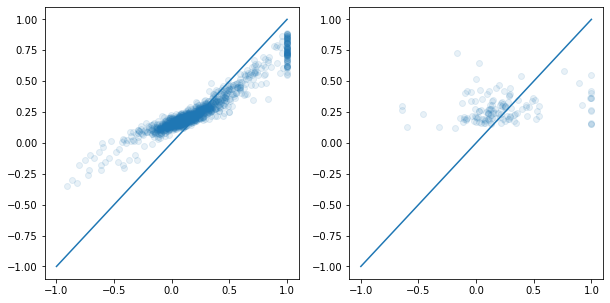

In [10]:
feature_importance, shap_cache = {}, {}
for year, year_data in data.groupby('year'):
    X = year_data.drop(['year', 'mun', 'year.1','year.2', 'mun.1', 'mun.2'], axis=1)
    X.apply(lambda x: np.log1p(x))
    
    year_remittances = remittances[remittances['Year'] == year]
    y = year_remittances['remittance_percent_change'].clip(-1, 1)
    
    valid_ids = list(set(X.index).intersection(year_remittances.index))
    
    X, y = X.loc[valid_ids], y.loc[valid_ids]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        train_size=.9,
        random_state=1)
    
    model = XGBRegressor(
        learning_rate=0.01, 
        max_depth=8, 
        n_estimators=1000)

    model.fit(
        X_train, y_train,
        eval_set=[
            (X_train, y_train),
            (X_test, y_test)
        ],
        early_stopping_rounds=10,
        verbose=True)
    
    explainer = shap.TreeExplainer(model)

    shap_values = explainer.shap_values(
        X_test, 
        check_additivity=False)
    
    features_shap_values = pd.DataFrame(
        shap_values,
        columns=X_test.columns)
    
    features_shap_values_contribution = features_shap_values.abs().sum()
    
    feature_importance[year] = features_shap_values_contribution

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    shap.summary_plot(
        shap_values, 
        X_test, 
        max_display=20)
    
    shap_cache[year] = {
        'X': X_test, 
        'shap_values': shap_values, 
        'f_shap_values': features_shap_values}
    
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    for it, (y_true, y_pred) in enumerate(zip([y_train, y_test], [y_pred_train, y_pred_test])):        
        ax[it].scatter(
            y_true.values,
            y_pred,
            alpha=.1)
        ax[it].plot([-1, 1], [-1, 1])
    
year_importance = pd.DataFrame(feature_importance).T
year_importance_norm = (year_importance.T / year_importance.T.sum()).T

In [ ]:
year_importance_stats = pd.DataFrame({
    'mean': year_importance_norm.mean().sort_values(),
    'std': year_importance_norm.std().sort_values(),
    'max': year_importance_norm.max().sort_values()
})

In [ ]:
# is_shap_always_greater_than_1 = (year_importance_norm < 0.0001).sum() == 0

# feature_selection = year_importance_stats[(
#     is_shap_always_greater_than_1
# ) & (
#     year_importance_stats['mean'] >= year_importance_stats['mean'].quantile(.5)
# )].sort_values('std').index

In [ ]:
top_n = 30
feature_selection = year_importance_stats['max'].sort_values().iloc[-top_n:].index

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
year_importance_norm[feature_selection].plot(
    kind='area',
    alpha=.5,
    grid=True,
    stacked=True,
    ax=ax,
    cmap='tab20')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.set_tight_layout('tight')

In [ ]:
for f in feature_selection:
    for year, year_shap in shap_cache.items():
        shap.summary_plot(
            year_shap['f_shap_values'][[f]].values, 
            year_shap['X'][[f]])